In [7]:
!pip install mediapipe

In [8]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# cargamos las clases necesarias
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Deteccion simple

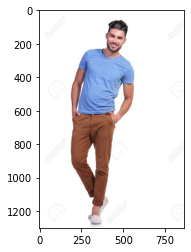

In [11]:
# cargamos la imagen
model = cv2.imread('/content/drive/MyDrive/EDEM_Master/PosesFaces/pose_casual.jpg')
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)

plt.imshow(model)
plt.show()

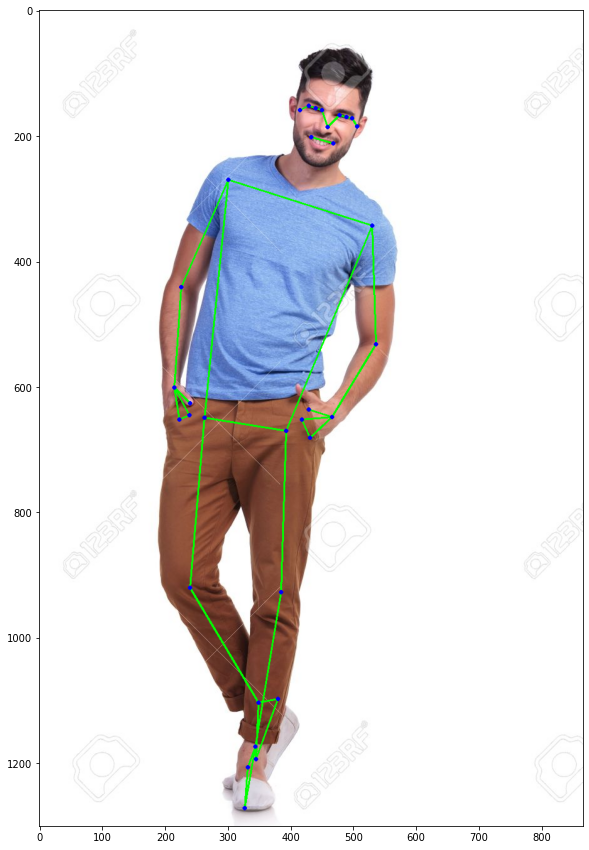

In [12]:
# cargamos las pipelines para la deteccion y anotacion
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, min_detection_confidence=0.5)

# realizazmos la inferencia
results = pose.process(model)

canvas = model.copy()
mp_drawing.draw_landmarks(canvas, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

plt.figure(figsize=(15, 15))
plt.imshow(canvas)
plt.show()

# probar con:
# model = cv2.imread('/content/drive/MyDrive/EDEM_Master/PosesFaces/pose_casual_2.jpg')

# Ejericio

Sacar el numero de repeticiones que hace el hombre del video.

Funciones de interes:

- Leer frames del video:


```
video = cv2.VideoCapture('/path/to/video.mp4')
ret, frame = video.read()
```

- Sacar los puntos de la pose:


```
pts = np.zeros((33, 2), np.float32)
for idx, landmark in enumerate(results.pose_landmarks.landmark):
      pts[idx] = landmark.x, landmark.y
```

- Sacar el angulo entre dos vectores:

```
def get_angle_from_2_vectors(vector_1, vector_2):
      unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
      unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
      dot_product = np.dot(unit_vector_1, unit_vector_2)
      angle = np.arccos(dot_product)
      return angle
      # en radianes!
```

- Calcular picos en la secuencia de angulos


```
from scipy.signal import find_peaks

peaks, _ = find_peaks(x, height=1.75, distance=50)
```



[Keypoints Indices](https://google.github.io/mediapipe/images/mobile/pose_tracking_full_body_landmarks.png)



In [23]:
video = cv2.VideoCapture('drive/MyDrive/EDEM_Master/PosesFaces/bar_pushup.mp4')
ret, frame = video.read()

In [24]:
ret

True

In [25]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

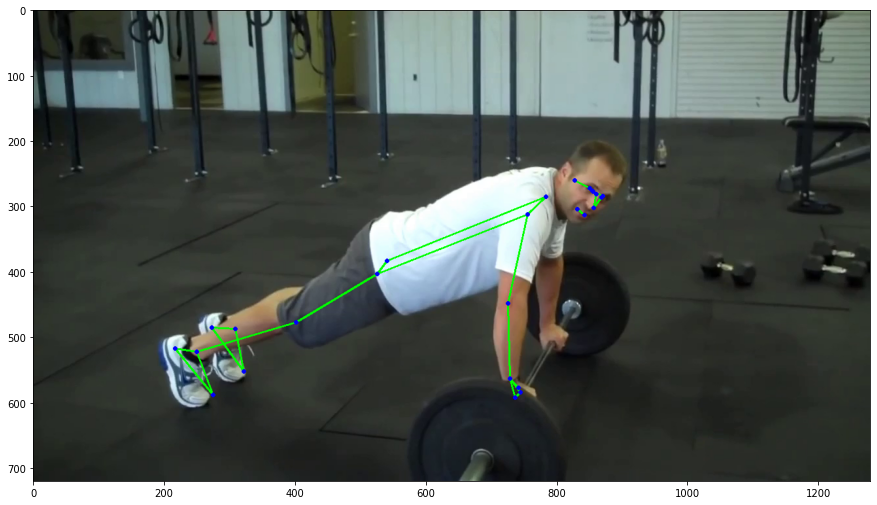

In [27]:
results = pose.process(frame)

canvas = frame.copy()
mp_drawing.draw_landmarks(canvas, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

plt.figure(figsize=(15, 15))
plt.imshow(canvas)
plt.show()

In [29]:
pts = np.zeros((33, 2), np.float32)
for idx, landmark in enumerate(results.pose_landmarks.landmark):
  pts[idx] = landmark.x, landmark.y

In [17]:
def get_angle_from_2_vectors(vector_1, vector_2):
  unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
  unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
  dot_product = np.dot(unit_vector_1, unit_vector_2)
  angle = np.arccos(dot_product)
  return angle

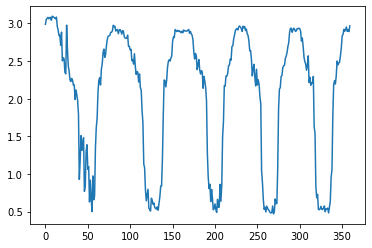

In [30]:
angles = []
while True:
  ret, frame = video.read()
  if not ret:
    break
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  results = pose.process(frame)

  pts = np.zeros((33, 2), np.float32)
  for idx, landmark in enumerate(results.pose_landmarks.landmark):
    pts[idx] = landmark.x, landmark.y

  vec_1 = pts[11] - pts[13]
  vec_2 = pts[15] - pts[13]

  angles.append(get_angle_from_2_vectors(vec_1, vec_2))

plt.plot(angles)
plt.show()

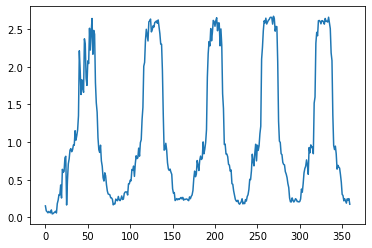

In [31]:
angles_mod = np.pi - np.asarray(angles)
plt.plot(angles_mod)
plt.show()

In [32]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(angles_mod, height=1.75, distance=50)

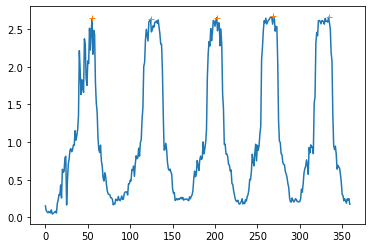

In [35]:
plt.plot(angles_mod)
plt.plot(peaks, angles_mod[peaks], '+')
plt.show()

In [33]:
print('Ha hecho {} repeticiones'.format(len(peaks)))

Ha hecho 5 repeticiones
